# Задание 3

## БИНАРНАЯ КЛАССИФИКАЦИЯ СБАЛАНСИРОВАННОГО И НЕСБАЛАНСИРОВАННОГО НАБОРА ДАННЫХ

**Цель работы:** изучение принципов решения задачи классификации с использованием методов машинного обучения.

**Основные задачи:**
- изучение инструментария Python для реализации алгоритмов бинарной
классификации;
- освоение метода логистической регрессии;
- изучение методов оценки корректности модели бинарной классификации;

**Набор данных:**

Анализ текучести кадров в компании, датасет – employee.csv. Набор данных содержит информацию о сотрудниках компании, включая их образование, историю работы, демографию и факторы, связанные с занятостью. Необходимо проанализировать проблемы, связанные с текучестью кадров в компании.

**Атрибуты данных:**
- **satisfaction_level** – уровень удовлетворенности (0-1)
- **last_evaluation** – время, прошедшее с момента последней оценки в годах
- **number_projects** – количество выполненных проектов
- **average_monthly_hours** – среднее количество рабочих часов за месяц
- **time_spend_company** – время работы в компании в годах
- **work_accident** – у сотрудника был несчастный случай на рабочем месте
- **promotion_last_5years** – было ли у сотрудника повышение за последние 5 лет
- **sales** – отдел, в котором работает сотрудник
- **salary** – уровень заработной платы
- **left** – работник уволился или нет (1 или 0) – целевая переменная

## 1. Загрузим набор данных как датафрейм библиотеки pandas. Используем тот же набор данных, что и в задании 2.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('employee.csv')

## 2. Получим представлении о наборе данных с помощью методов shape, head, describe, info библиотеки pandas.

In [11]:
print(df.shape) # количество строк и столбцов

(14999, 10)


In [12]:
print(df.head())  # первые 5 строк таблицы

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3 

In [13]:
print(df.describe()) # статистика по числовым столбцам

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.0000

In [14]:
print(df.info())     # информация о типах данных и пропусках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


## 3. Проверим сбалансированность набора данных.

In [21]:
print(df['left'].value_counts(normalize=True))
# анализируем по признаку булевой переменной left

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


Наблюдается определённый перевес в сторону значения 1

Проверяем на выбросы

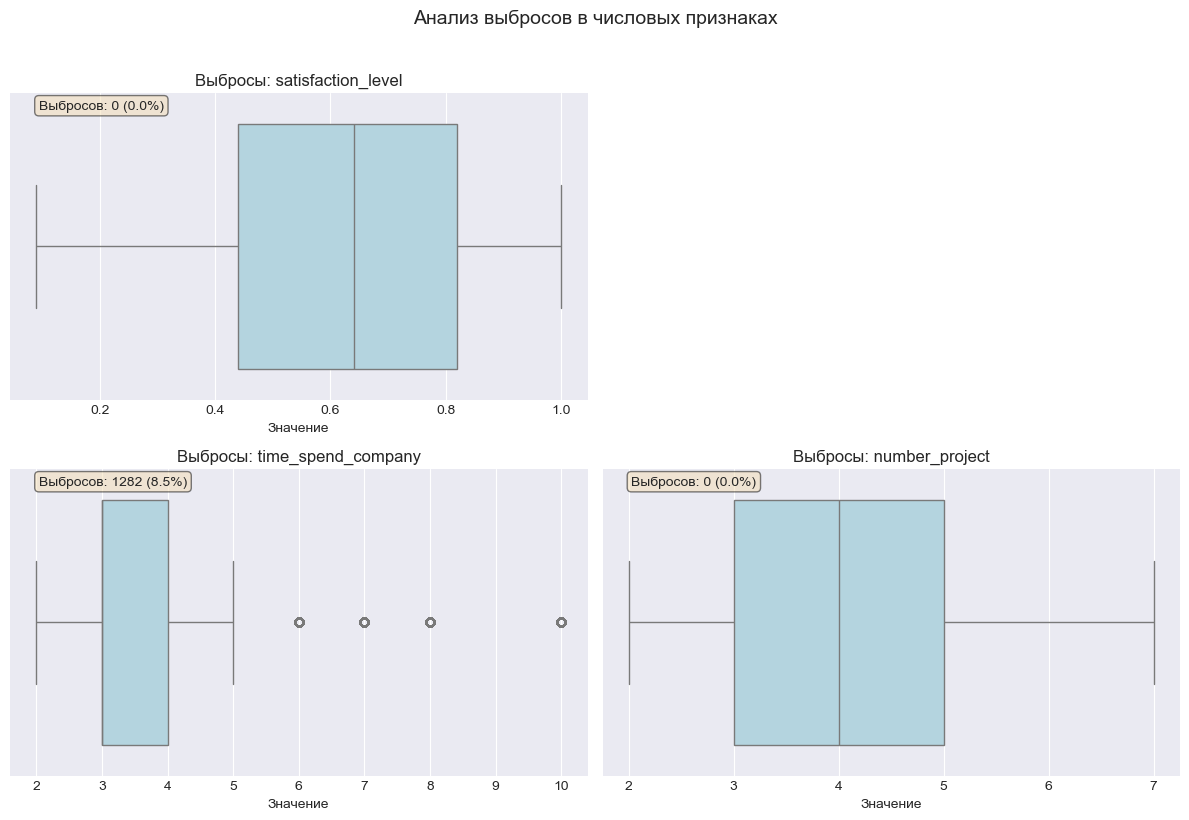

In [30]:
features_for_outliers = ['satisfaction_level', 'average_monthly_hours', 'time_spend_company', 'number_project']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, feature in enumerate(features_for_outliers):
    if feature in df.columns:
        # Boxplot
        sns.boxplot(x=df[feature], ax=axes[idx], color='lightblue')
        axes[idx].set_title(f'Выбросы: {feature}')
        axes[idx].set_xlabel('Значение')
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers_count = len(outliers)
        outliers_percent = outliers_count / len(df) * 100

        axes[idx].text(0.05, 0.95, f'Выбросов: {outliers_count} ({outliers_percent:.1f}%)',
                      transform=axes[idx].transAxes, fontsize=10,
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        axes[idx].axis('off')

plt.suptitle('Анализ выбросов в числовых признаках', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Визуализация целевой переменной

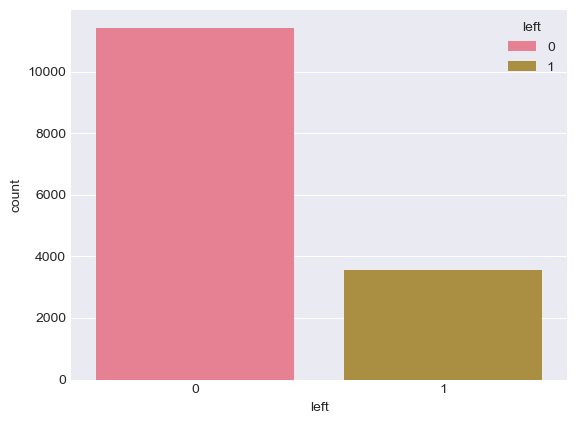

In [32]:
df_copy = df.copy()
#преобразование числового типа в логический
df_copy['left'] = df_copy['left'].astype(bool)
sns.countplot(df, x='left', hue='left')
plt.show()

##  4. Разделяем данные на признаки и целевую переменную

In [34]:
y = df_copy['left']
X = df_copy.drop('left', axis=1)

print("Целевая переменная (y):")
print(y.head())

print("\nПризнаки (X):")
print(X.head())

Целевая переменная (y):
0    True
1    True
2    True
3    True
4    True
Name: left, dtype: bool

Признаки (X):
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years department  salary  
0                   3              0                      0      sales     low  
1                   6              0                      0      sales  medium  
2                   4              0                      0      sales  medium  
3                   5              0                      0      sales     low  
4

##  5. Применяем операцию нормализации для численной устойчивости

In [40]:
if not isinstance(X, pd.DataFrame):
    if hasattr(X_original, 'columns'):
        X = pd.DataFrame(X, columns=X_original.columns)
    else:
        X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

print(f"Тип X: {type(X)}")
print(f"Форма X: {X.shape}")

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nЧисловые признаки ({len(numeric_features)}): {numeric_features}")
print(f"Категориальные признаки ({len(categorical_features)}): {categorical_features}")

if categorical_features:
    from sklearn.preprocessing import LabelEncoder
    
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"  '{col}' закодирован: {list(le.classes_)}")
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

if numeric_features:
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])
    print(f"Нормализовано признаков: {len(numeric_features)}")
    print("\nСтатистика после нормализации:")
    for col in numeric_features[:5]:
        print(f"  {col}: среднее={X[col].mean():.4f}, std={X[col].std():.4f}")
else:
    print("Нет числовых признаков для нормализации")

print(f"\nИтоговый размер X: {X.shape}")
print("\nПервые 5 строк после обработки:")
print(X.head())

Тип X: <class 'pandas.core.frame.DataFrame'>
Форма X: (14999, 9)

Числовые признаки (9): ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary']
Категориальные признаки (0): []
Нормализовано признаков: 9

Статистика после нормализации:
  satisfaction_level: среднее=-0.0000, std=1.0000
  last_evaluation: среднее=0.0000, std=1.0000
  number_project: среднее=-0.0000, std=1.0000
  average_montly_hours: среднее=-0.0000, std=1.0000
  time_spend_company: среднее=-0.0000, std=1.0000

Итоговый размер X: (14999, 9)

Первые 5 строк после обработки:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0           -0.936495        -1.087275       -1.462863             -0.882040   
1            0.752814         0.840707        0.971113              1.220423   
2           -2.022479         0.957554        2.593763              1.420657   
3            0.43104

##  6. Разделяем данные на тренировочный и тестовый наборы

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 7. Обучаем модель логической регрессии

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
y_pred = model.predict(X_test)

## 8. Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive (TP) = ', TP)
print('False Positive (FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative (FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive (TP) =  220
False Positive (FP) =  238
True Negative(TN) =  2643
False Negative (FN) =  649
Accuracy of the binary classification = 0.763


In [47]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7634666666666666


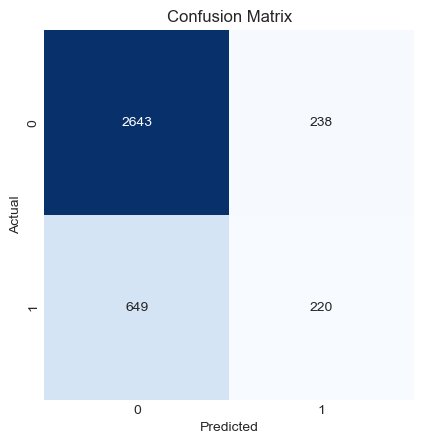

In [48]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [50]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Completeness: {recall:.2f}")

Precision: 0.48
Completeness: 0.25


In [54]:
# Оценка F1-меры
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")

F1-мера: 0.33


In [56]:
df_copy.select_dtypes(include=[np.number]).corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


## 9. Строим ROC-кривую

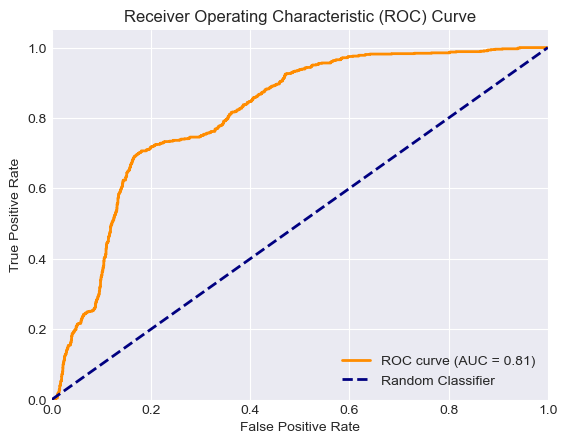

In [58]:
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(X_test) [:, 1]

fpr, tpr, thresholds = roc_curve (y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()